<a href="https://colab.research.google.com/github/joheras/MusicaCatedralStoDomingoIER/blob/main/Notebooks/SacarM%C3%BAsica/TutorialImportante.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tutorial
#### Vamos a hacer una breve explicación de como reproducir la música de una imagen anotada

Tenemos dos modelos:
- Un lector de pentagramas
- Un detector de objetos en obras

Hay mucho margen de mejora todavía. Puede ser porque los modelos no estén todavía bien entrenados o porque se pueda pulir de otra forma más sencilla.

## Librerías y funciones

In [349]:
import shutil
shutil.make_archive('Musica', 'zip', '/content/Musica')

'/content/Musica.zip'

In [6]:
%%capture
pip install py_midicsv

In [1]:
%%capture
pip install MIDIUtil

In [7]:
%%capture
pip install pretty_midi

In [8]:
%%capture
!pip install icevision[all]==0.5.1

In [9]:
%%capture
!pip install torchtext==0.8.1

In [10]:
%%capture
!pip install fastai --upgrade

In [1]:
from icevision.all import *
from fastai.vision.all import *
import cv2
import pickle
import midiutil
import pretty_midi
import IPython.display as ipd
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import patches
from matplotlib import colors
import statistics
import py_midicsv as pm
import random
import sys
import os
import json
import music21 as m21

In [2]:
def abrirImagen(path):
  return cv2.imread(str(path))

def imagenDeImagen(img,h=16,w=16):
  plt.figure(figsize = (h,w))
  plt.imshow(img)
  plt.show()

def mostrarImagen(path):
  img=cv2.imread(str(path))
  imagenDeImagen(img)
  return abrirImagen(img)


def imgAnotada(path):
  colores = {'claved':(119, 90, 17), 'claves':(119, 90, 17), 'clavef':(119, 90, 17), 'nota1:8':(150,255,209), 'nota1':(150,255,209), 'nota2':(150,255,209), 'nota4':(150,255,209), 'nota1:2':(150,255,209), 'nota1:4':(150,255,209), 'notae':(150,255,209), 'sos':(242,170,255), 'bem':(242,170,255), 'cal':(242,170,255), 'bec':(242,170,255), 'sil0':(159,142,243), 'sil1':(159,142,243), 'sil2':(159,142,243), 'sil1:2':(159,142,243), 'sil1:4':(159,142,243), '2x4':(173,76,0), '3x4':(173,76,0), '3x2':(173,76,0), '4x4':(173,76,0), '6x8':(173,76,0), 'punt':(0,255,0), 'liga':(40,47,153),'3':(255,0,0),'P2':(255,0,0), 'P1':(255,0,0), 'mf':(255,0,0), 'check':(240,0,35),'line':(119,189,255),'other':(35,99,33)}
  img = cv2.imread(str(path))
  n=path.stem+'.json'
  anotacion= json.loads(open(str(path.parent.parent/'annotations'/n)).read())
  for elemento in anotacion:
    x, y, z, w=elemento["box"]
    cv2.rectangle(img, (x, y), (z,w), colores[elemento["label"]], 1)
  return img

def imgEscrita(path):
  colores = {'claved':(119, 90, 17), 'claves':(119, 90, 17), 'clavef':(119, 90, 17), 'nota1:8':(150,255,209), 'nota1':(150,255,209), 'nota2':(150,255,209), 'nota4':(150,255,209), 'nota1:2':(150,255,209), 'nota1:4':(150,255,209), 'notae':(150,255,209), 'sos':(242,170,255), 'bem':(242,170,255), 'cal':(242,170,255), 'bec':(242,170,255), 'sil0':(159,142,243), 'sil1':(159,142,243), 'sil2':(159,142,243), 'sil1:2':(159,142,243), 'sil1:4':(159,142,243), '2x4':(173,76,0), '3x4':(173,76,0), '3x2':(173,76,0), '4x4':(173,76,0), '6x8':(173,76,0), 'punt':(0,255,0), 'liga':(40,47,153),'3':(255,0,0),'P2':(255,0,0), 'P1':(255,0,0), 'mf':(255,0,0), 'check':(240,0,35),'line':(119,189,255),'other':(35,99,33)}
  img = cv2.imread(str(path))
  img = imgAnotada(path)
  n=path.stem+'.json'
  anotacion= json.loads(open(str(path.parent.parent/'annotations'/n)).read())
  for elemento in anotacion:
    x, y, z, w=elemento["box"]
    cv2.putText(img, elemento["label"], (int(x+(z-x)/2), w+10), cv2.FONT_HERSHEY_TRIPLEX,0.35, colores[elemento["label"]], 1)
  return img

def pintarPredicciones(num):
  for f in files[0:num]:
    clone=imgAnotada(f)
    txt_pred=open('input/detection-results/'+f.stem+'.txt')
    linea_pred=txt_pred.readline() 
    while linea_pred!='':
      logit,conf,x1,y1,z1,w1=linea_pred.split()
      linea_pred=txt_pred.readline()
      cv2.rectangle(clone, (int(x1), int(y1)), (int(z1),int(w1)), (255, 0, 0), 2)
    imagenDeImagen(clone,31,10)

In [3]:
def imgAnotada2(path):
  colores = {'title':(119, 90, 17), 'autor':(150,255,209), 'ritmo':(242,170,255), 'staff':(119,189,255)}
  img = cv2.imread(str(path))
  n=path.stem+'.json'
  anotacion= json.loads(open(str(path.parent.parent/'annotations'/n)).read())
  for elemento in anotacion:
    x, y, z, w=elemento["box"]
    cv2.rectangle(img, (x, y), (z,w), (colores[elemento["label"]]), 1)
  return img

def imgEscrita2(path):
  colores = {'title':(119, 90, 17), 'autor':(150,255,209), 'ritmo':(242,170,255), 'staff':(119,189,255)}
  img = cv2.imread(str(path))
  img = imgAnotada(path)
  n=path.stem+'.json'
  anotacion= json.loads(open(str(path.parent.parent/'annotations'/n)).read())
  for elemento in anotacion:
    x, y, z, w=elemento["box"]
    cv2.putText(img, elemento["label"], (int(x+(z-x)/2), w+10), cv2.FONT_HERSHEY_TRIPLEX,0.35, (colores[elemento["label"]]), 1)
  return img

def pintarPredicciones2(num):
  for f in files[0:num]:
    clone=imgAnotada(f)
    txt_pred=open('input/detection-results/'+f.stem+'.txt')
    linea_pred=txt_pred.readline() 
    while linea_pred!='':
      logit,conf,x1,y1,z1,w1=linea_pred.split()
      linea_pred=txt_pred.readline()
      cv2.rectangle(clone, (int(x1), int(y1)), (int(z1),int(w1)), (255, 0, 0), 2)
    imagenDeImagen(clone,31,10)

## Mostrando obras y pentagramas anotados

In [4]:
%%capture
!unzip Musica.zip

### Pentagrama
De momento tenemos dos tipos

In [ ]:
files = get_files('/content/Musica/pents', folders = ['images'])

- Los de Santodomingo

In [ ]:
files[26] # 26

Path('/content/pents/images/pent1205.jpg')

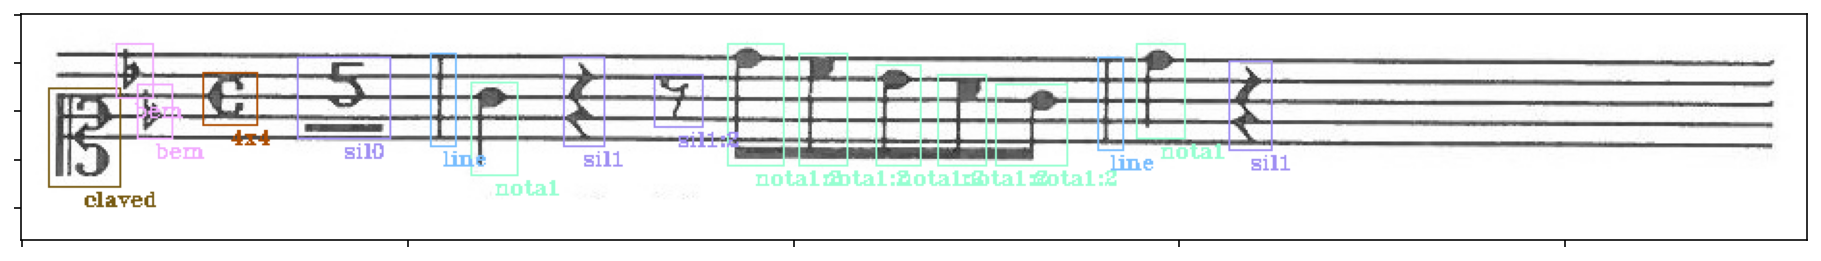

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(16,5))
ax.imshow(imgEscrita(files[26]),cmap=plt.cm.binary)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
plt.show()

- Vamos a escribir los dos primeros compases en formato midi:

De momento ponemos el tiempo así a lo loco. El tempo es otra cosa que se puede medir sin ninguna dificultad dentro de una partitura.

In [ ]:
ml = [[0.0,0.5/2,76,100,'Piano'],
      [0.5/2,1/2,76,100,'Piano'],
      [1.5/2,2/2,76,100,'Piano'],
      [2.5/2,3/2,72,100,'Piano'],
      [3/2,4/2,76,100,'Piano'],
      [4/2,5/2,79,100,'Piano'],
      [6/2,7/2,67,100,'Piano']]
ml = pd.DataFrame(ml, columns=['Start', 'End', 'Pitch', 'Velocity', 'Instrument'])
ml.head()

,Start,End,Pitch,Velocity,Instrument
0,0.00,0.25,76,100,Piano
1,0.25,0.50,76,100,Piano
2,0.75,1.00,76,100,Piano
3,1.25,1.50,72,100,Piano
4,1.50,2.00,76,100,Piano


In [ ]:
instrument = pretty_midi.Instrument(program=0, is_drum=False, name="Piano")
for i in range(0,len(ml)):
  instrument.notes.append(pretty_midi.Note(start=ml.iloc[i][0],end=ml.iloc[i][1],pitch=ml.iloc[i][2],velocity=ml.iloc[i][3]))

In [ ]:
fn = '/content/prueba.mid'
midi_data = pretty_midi.PrettyMIDI(fn)
midi_data

In [ ]:
midi_data = pretty_midi.PrettyMIDI(fn)
midi_data.instruments[0] = instrument

In [ ]:
Fs = 22050
audio_data = midi_data.synthesize(fs=Fs)
ipd.Audio(audio_data, rate=Fs)

In [ ]:
midi_data.write('mario.mid')

## Predicción

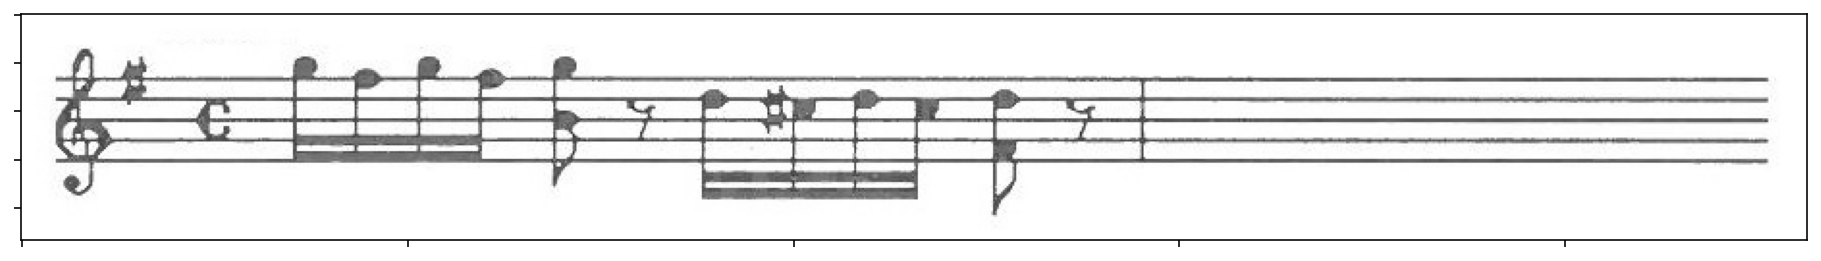

In [ ]:
pent = cv2.imread('/content/Musica/pents/images/pent1407.jpg')
fig, ax = plt.subplots(1,1,figsize=(16,5))
ax.imshow(pent,cmap=plt.cm.binary)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
plt.show()

### Modelo de detección

In [ ]:
def get_iou(bb1, bb2):
    assert bb1[0] < bb1[2]
    assert bb1[1] < bb1[3]
    assert bb2[0] < bb2[2]
    assert bb2[1] < bb2[3]
    x_left = max(bb1[0], bb2[0])
    y_top = max(bb1[1], bb2[1])
    x_right = min(bb1[2], bb2[2])
    y_bottom = min(bb1[3], bb2[3])
    if x_right < x_left or y_bottom < y_top:
        return 0.0
    intersection_area = (x_right - x_left) * (y_bottom - y_top)
    bb1_area = (bb1[2] - bb1[0]) * (bb1[3] - bb1[1])
    bb2_area = (bb2[2] - bb2[0]) * (bb2[3] - bb2[1])
    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

In [ ]:
d={'background':0,'claved':1, 'claves':2, 'clavef':3, 'nota1':4, 'nota2':5, 'nota4':6, 'nota1:2':7, 'nota1:4':8, 'notae':9, 'sos':10, 'bem':11, 'bec':12, 'sil0':13, 'sil1':14, 'sil2':15, 'sil1:2':16, 'sil1:4':17, '2x4':18, '3x4':19, '4x4':20, '6x8':21, 'punt':22, 'liga':23,'3':24,'line':25,'P2':26, 'nota1:8':27, 'cal':28, '3x2':29,'mf':30,'P1':31,'check':32}
d = {v: k for k, v in d.items()}

def qsort(bboxs,labels,scores):
  if bboxs == []:
    return bboxs,labels,scores
  bbox = bboxs[0]
  label = labels[0]
  score = scores[0]
  n = len(labels[1:])
  bboxsL,labelsL,scoresL = qsort([b for b in bboxs[1:] if b[0] < bbox[0]],[labels[1:][i] for i in range(0,n) if bboxs[1:][i][0] < bbox[0]],[scores[1:][i] for i in range(0,n) if bboxs[1:][i][0] < bbox[0]])
  bboxsU,labelsU,scoresU = qsort([b for b in bboxs[1:] if b[0] >= bbox[0]],[labels[1:][i] for i in range(0,n) if bboxs[1:][i][0] >= bbox[0]],[scores[1:][i] for i in range(0,n) if bboxs[1:][i][0] >= bbox[0]])

  return bboxsL + [bbox] + bboxsU, labelsL + [label] + labelsU, scoresL + [score] + scoresU

def image2pred(path):
  test = cv2.imread(path)
  Y,X,_=test.shape
  infer_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(size=923), tfms.A.Normalize()])
  infer_ds = Dataset.from_images([test], infer_tfms)
  infer_dl = faster_rcnn.infer_dl(infer_ds, batch_size=1)
  samples, preds = faster_rcnn.predict_dl(model=model, infer_dl=infer_dl)
  L = []
  labels = list(preds[0]['labels'])
  bboxs = preds[0]['bboxes']
  for i in range(0,len(labels)):
    xmin=bboxs[i].xmin
    ymin=bboxs[i].ymin-(samples[0]['img'].shape[0]-samples[0]['height'])/2
    xmax=bboxs[i].xmax
    ymax=bboxs[i].ymax-(samples[0]['img'].shape[0]-samples[0]['height'])/2
    xmin=int(X*xmin/samples[0]['width'])
    ymin=int(Y*ymin/samples[0]['height'])
    xmax=int(X*xmax/samples[0]['width'])
    ymax=int(Y*ymax/samples[0]['height'])
    L.append([xmin,ymin,xmax,ymax])
  scores = list(preds[0]['scores'])
  L,labels,scores = qsort(L,labels,scores)
  labels = [d[l] for l in labels]
  
  return L,labels,scores

In [ ]:
def remove_notas(bboxs,labels,scores):
  n = len(bboxs)
  L = []
  for i in range(0,n):
    k = len(bboxs[i:])
    bb1 = bboxs[i]
    l1 = labels[i]
    s1 = scores[i]
    for j in range(0,k):
      bb2 = bboxs[i:][j]
      l2 = labels[i:][j]
      s2 = scores[i:][j]
      if bb1[2]-bb1[0] >= 55 and 'nota' in l1:
        L.append(i)
      elif get_iou(bb1, bb2) > 0.5 and 'nota' in l1 and 'nota' in l2:
        if l1 > l2:
          L.append(i+j)
        if l1 < l2:
          L.append(i)
        if l1 == l2 and get_iou(bb1, bb2) < 1:
          if s1 > s2:
            L.append(i+j)
          else:
            L.append(i)
  L = list(np.unique(L))
  b,l,s = [],[],[]
  for i in range(0,n):
    if not(i in L):
      b.append(bboxs[i])
      l.append(labels[i])
      s.append(scores[i])
  return b,l,s

In [ ]:
state_dict = torch.load('mejor.pth')
model = faster_rcnn.model(num_classes=33)

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


  0%|          | 0.00/160M [00:00<?, ?B/s]

In [ ]:
model.load_state_dict(state_dict)

<All keys matched successfully>

In [ ]:
test = cv2.imread('/content/Musica/pents/images/super_mario_theme9.jpg')
infer_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(size=923), tfms.A.Normalize()])
infer_ds = Dataset.from_images([test], infer_tfms)
infer_dl = faster_rcnn.infer_dl(infer_ds, batch_size=1)
samples, preds = faster_rcnn.predict_dl(model=model, infer_dl=infer_dl)

  0%|          | 0/1 [00:00<?, ?it/s]

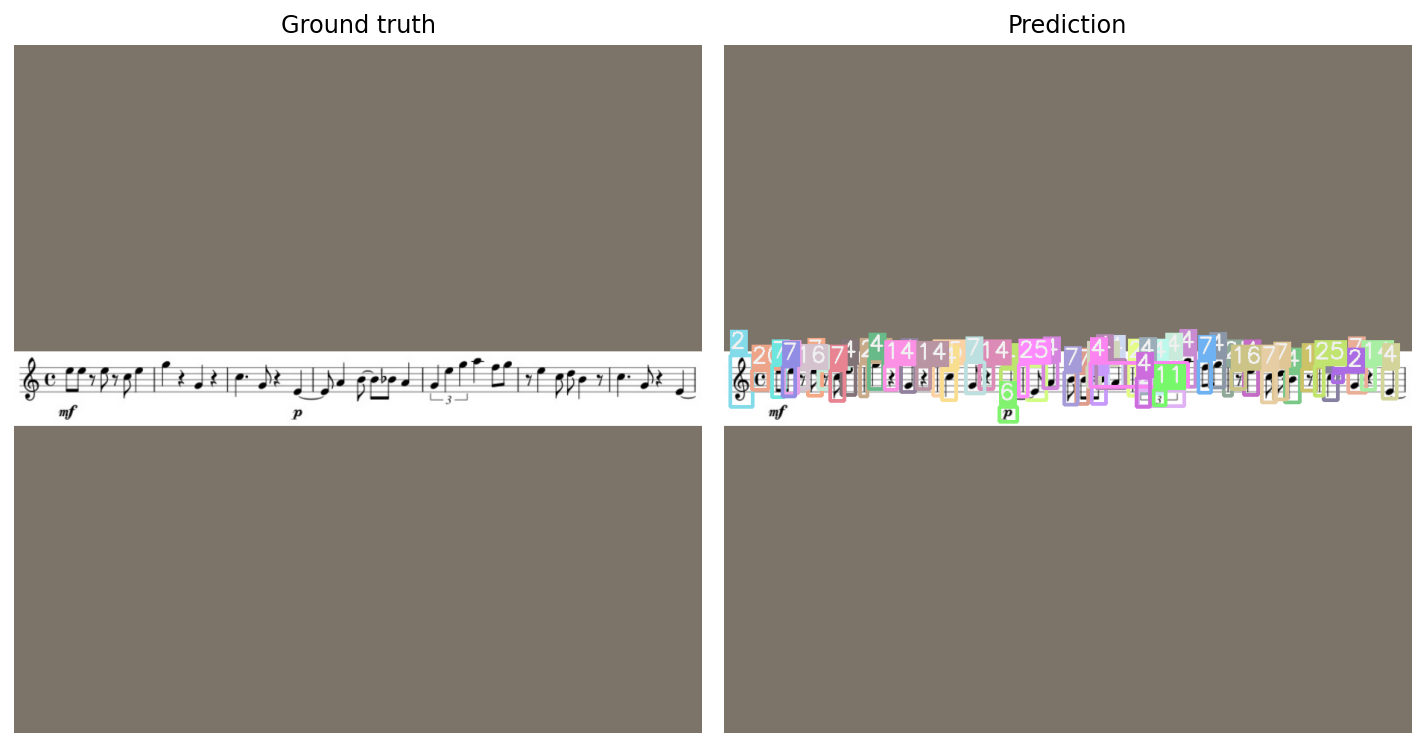

In [ ]:
show_preds(samples=samples, preds=preds,denormalize_fn=denormalize_imagenet,figsize=(10,10))

In [ ]:
bboxs,labels,scores = image2pred('/content/Musica/pents/images/pent1407.jpg')

  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
bboxs,labels,scores = remove_notas(bboxs,labels,scores)

- **Predicción final**

In [ ]:
print(labels)

['claves', 'sos', '4x4', 'nota1:2', 'nota1:4', 'nota1:4', 'nota1:4', 'nota1:2', 'sil1:2', 'nota1:2', 'sos', 'nota1:4', 'nota1:4', 'nota1:4', 'nota1:2', 'sil1:2', 'line']


### Modelo de clasificación de notas

  El principal problema de este modelo es que los datos no están balanceados. Se intentará arreglar o buscar otra alternativa más fácil para detectar la altura de las notas en el pentagrama.

In [ ]:
learn_inf = load_learner('export.pkl')

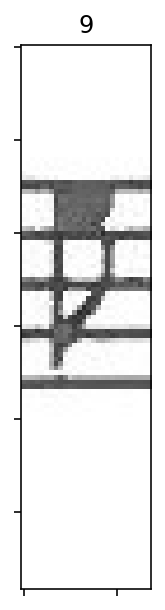

In [ ]:
pent = cv2.imread('/content/Musica/notas/9/nota1026-8-.jpg')
fig, ax = plt.subplots(1,1,figsize=(16,5))
ax.imshow(pent,cmap=plt.cm.binary)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.set_title(int(learn_inf.predict('/content/Musica/notas/9/nota1026-8-.jpg')[0]))
plt.show()

### Final: pentagrama2midi
- Faltan por pulir y añadir más cosas (como la clave de do).
- Falta además, saber si las claves son en primera, segunda, tercera...

In [ ]:
def entre(y,tupla):
  return tupla[0] <= y <= tupla[1]

def altura(coord_y,alturas):
  for altura in alturas:
    if entre(coord_y,altura): return alturas[altura]%7

def pentagrama2midi(path,tempo = 0.5,instrument = 'Piano'):

  fn = '/content/prueba.mid'
   # Una negra valdrá medio segundo por defecto
  bboxs,labels,scores = image2pred(path)
  bboxs,labels,scores = remove_notas(bboxs,labels,scores)

  # Coordendas de los pentagramas

  pent = cv2.imread(path)
  pent2 = pent.copy()
  pent  = cv2.cvtColor(pent,cv2.COLOR_RGB2GRAY)
  _,pent=cv2.threshold(pent, 0, 1, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
  kernel = np.ones((1,250),dtype='uint8')
  pent = cv2.erode(pent,kernel)
  kernel = np.ones((2,1),dtype='uint8')
  pent = cv2.dilate(pent,kernel)
  cnts,_ = cv2.findContours(pent, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  L = []
  print('Número de pentagramas detectados: ' + str(len(cnts)))
  for c in cnts:
    x, y, w, h = cv2.boundingRect(c)
    L.append(y)
  distancias = list(np.array(L[:-1])-np.array(L[1:]))
  p5 = L[0]-int(distancias[0]/4),L[0]+int(distancias[0]/4)
  e4 = L[0]+int(distancias[0]/4),L[0]+3*int(distancias[0]/4)
  p4 = L[1]-int(distancias[0]/4),L[1]+int(distancias[1]/4)
  e3 = L[1]+int(distancias[1]/4),L[1]+3*int(distancias[1]/4)
  p3 = L[2]-int(distancias[1]/4),L[2]+int(distancias[2]/4)
  e2 = L[2]+int(distancias[2]/4),L[2]+3*int(distancias[2]/4)
  p2 = L[3]-int(distancias[2]/4),L[3]+int(distancias[3]/4)
  e1 = L[3]+int(distancias[3]/4),L[3]+3*int(distancias[3]/4)
  p1 = L[4]-int(distancias[3]/4),L[4]+int(distancias[3]/4)
  alturas =  {p1:2,e1:3,p2:4,e2:5,p3:6,e3:7,p4:8,e4:9,p5:10}
  # valores por defecto y demás cosas, si es preciso algún valor será modificado durante el proceso
  # Por ej. si encuentra una clave de do cambiar clave a 'claved'

  clave = 'claves'
  t = 0
  ml = []
  claves = {'claves':{-4: 53, -3: 55, -2: 57, -1: 59, 0: 60, 1: 62, 2: 64, 3: 65, 4: 67, 5: 69, 6: 71, 7: 72, 8: 74, 9: 76, 10: 77, 11: 79, 12: 81, 13: 83, 14: 84},
            'clavef':{-4:33, -3:35, -2:36, -1:38, 0:40, 1:41, 2:43, 3:45, 4:47, 5:48, 6:50, 7:52, 8:53, 9:55, 10:57, 11:59, 12:60, 13:62, 14:64}}
  escala = {0:0,1:0,2:0,3:0,4:0,5:0,6:0} # Sin sostenidos ni bemoles
  region = 100 # Para diferenciar los sostenidos y bemoles que marcan la escala
  cont = 0 
  bem,sos,bec,tresillo = False,False,False,False
  comp = '2x4'
  tempo = tempo
  silencios = {'sil0':2*tempo,'sil2':2*tempo,'sil1':tempo,'sil1:2':tempo/2,'sil1:4':tempo/4,'sil1:8':tempo/8}
  notas = {'nota4':2*tempo,'nota2':2*tempo,'nota1':tempo,'nota1:2':tempo/2,'nota1:4':tempo/4,'nota1:8':tempo/8}
  # Proceso de anotación

  n = len(labels)

  for i in range(0,n):

    if 'clave' in labels[i]:
      clave = labels[i]
      region = bboxs[i][2] + 50
    if 'x' in labels[i]:
      comp = labels[i]
      if comp == '6x8':
        tempo = (2/3)*tempo
        silencios = {'sil0':2*tempo,'sil2':2*tempo,'sil1':tempo,'sil1:2':tempo/2,'sil1:4':tempo/4,'sil1:8':tempo/8}
        notas = {'nota4':2*tempo,'nota2':2*tempo,'nota1':tempo,'nota1:2':tempo/2,'nota1:4':tempo/4,'nota1:8':tempo/8}  
    if labels[i] == 'bem':
      y = bboxs[i][1] - 3
      x = bboxs[i][3]
      if x <= region: escala[altura(y,alturas)] = - 1
      else: bem = True
    if labels[i] == 'sos':
      y = bboxs[i][1] - int(bboxs[i][3]/2-bboxs[i][1]/2)
      x = bboxs[i][3]
      if x <= region: escala[altura(y,alturas)] = + 1
      else: sos = True
    if labels[i] == 'bec':
      y = bboxs[i][1] - int(bboxs[i][3]/2-bboxs[i][1]/2)
      bec = True
    if labels[i] == '3':
      tresillo = True
      zona = bboxs[i][0]-2,bboxs[i][1]+2
    if labels[i] == 'line':
      bem,sos,bec,tresillo = False,False,False,False
    
    if 'sil' in labels[i]:
      cont = cont + silencios[labels[i]]
    if 'nota' in labels[i]: # falta tener en cuenta notas superpuestas
      xmin,xmax = bboxs[i][0],bboxs[i][2]
      if xmin <= xmax <= pent2.shape[1]:
        nota = int(learn_inf.predict(pent2[:,xmin:xmax])[0])
        if sos == True:
          ml.append([cont,cont+notas[labels[i]],claves[clave][nota]+1,100,instrument])
          sos = False
          cont = cont+notas[labels[i]]
        elif bem == True:
          ml.append([cont,cont+notas[labels[i]],claves[clave][nota]-1,100,instrument])
          bec = True
          cont = cont+notas[labels[i]]
        elif bec == True:
          ml.append([cont,cont+notas[labels[i]],claves[clave][nota],100,instrument])
          bec == False
          cont = cont+notas[labels[i]]
        else:
          ml.append([cont,cont+notas[labels[i]],claves[clave][nota]+escala[nota%7],100,instrument])
          cont = cont+notas[labels[i]]

  ml = pd.DataFrame(ml, columns=['Start', 'End', 'Pitch', 'Velocity', 'Instrument'])
  instrumento = pretty_midi.Instrument(program=0, is_drum=False, name=instrument)
  for i in range(0,len(ml)):
    instrumento.notes.append(pretty_midi.Note(start=ml.iloc[i][0],end=ml.iloc[i][1],pitch=ml.iloc[i][2],velocity=ml.iloc[i][3]))
  midi_data = pretty_midi.PrettyMIDI(fn)
  midi_data.instruments[0] = instrumento
  id = path[:path.find('.')][::-1][:path[:path.find('.')][::-1].find('/')][::-1]
  midi_data.write('predictions/'+id+'.mid')
  return bboxs,labels

In [ ]:
bboxs,labels = pentagrama2midi('/content/Musica/pents/images/pent252.jpg',tempo=0.5)

## Anotación semi-automática

In [ ]:
from sklearn.model_selection import train_test_split
muestra = [i for i in range(1,2309)]
_, muestra, _, _, = train_test_split(muestra, muestra, test_size=0.13, random_state=42)

In [ ]:
len(muestra)

- **Corrigiendo errores de detección**

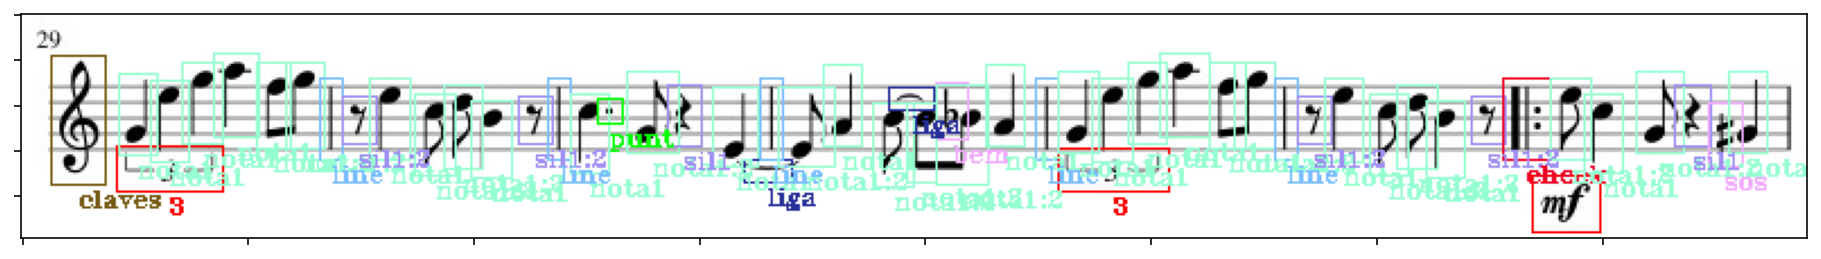

In [348]:
path = Path('/content/Musica/pents/images/super_mario_theme5.jpg')
fig, ax = plt.subplots(1,1,figsize=(16,5))
ax.imshow(imgEscrita(path),cmap=plt.cm.binary) 
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
plt.show()

- **Anotando las notas**

In [ ]:
files.index(Path('/content/Musica/pents/images/pent'+str(muestra[110])+'.jpg')) # 111

In [ ]:
muestra[110] # 111

In [ ]:
CAMBIAR
img = cv2.imread(str(files[104])) 
n=files[104].stem+'.json'
anotacion= json.loads(open(str(files[104].parent.parent/'annotations'/n)).read())
L = []
k = 0
for elemento in anotacion:
  if 'nota' in elemento['label']:
    xmin,ymin,xmax,ymax = elemento['box']
    fig, ax = plt.subplots(1,1,figsize=(2,2))
    ax.imshow(img[:,xmin-1:xmax+1])
    #ax.set_title(L[k])
    #cv2.imwrite('/content/Musica/notas/'+str(L[k])+'/nota248-'+str(k)+'-'+'.jpg',img[:,xmin-1:xmax+1])  
    k = k + 1